In [106]:
#Importing neccessary packages

import numpy as np                      # linear algebra, vectors and matrices
import pandas as pd                     # tables and data manipulations-data processing-CSV file I/O (e.g. pd.read_csv)
import warnings                         # off warning mode
warnings.filterwarnings('ignore')

In [107]:
#Loading dataset(Autosales-Global)
Sales=pd.read_csv("AutoSAles.csv")
Sales.head()

,BRAND,YEAR,SALES
0,Alfa Romeo,2013,0
1,Genesis,2013,0
2,Tesla,2013,0
3,Maybach,2013,1
4,Isuzu,2013,42


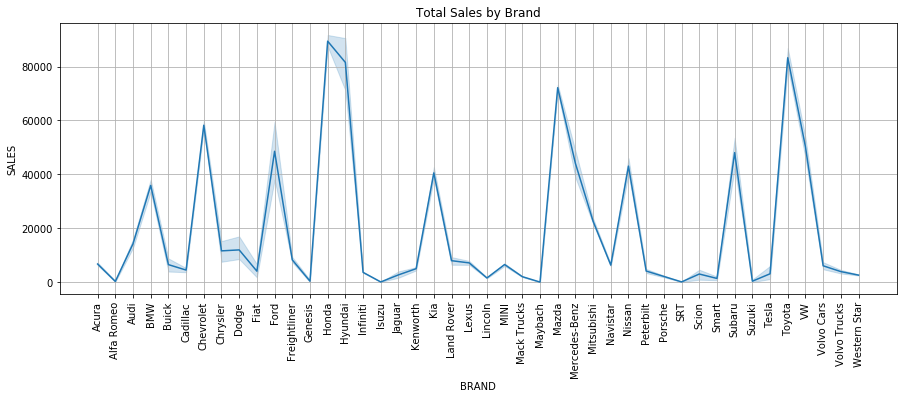

In [108]:
#Data visualization

import matplotlib.pyplot as plt         # plots
from matplotlib import pyplot
import seaborn as sns                   # more plots
plt.figure(figsize=(15,5))
sns.lineplot(x='BRAND',y='SALES',data=Sales)
plt.title('Total Sales by Brand')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [109]:
#Loading dataset of Chrysler-Canada and spliting data into train & validation data

Chry=pd.read_csv("CHRYSLER_SALES.csv", header=0, index_col=0)
split_point = len(Chry) - 12
dataset, validation = Chry[0:split_point], Chry[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')
dataset=pd.read_csv("dataset.csv",header=0, index_col=0)
validation=pd.read_csv("validation.csv",header=0, index_col=0)
Chry.head()

Dataset 156, Validation 12


,SALES
DATE,
01-01-2005,33918
01-02-2005,53575
01-03-2005,60382
01-04-2005,61332
01-05-2005,61696


In [110]:
print(Chry.describe())

              SALES
count    168.000000
mean   27294.077381
std    13813.979383
min     9046.000000
25%    17148.250000
50%    23422.500000
75%    33058.250000
max    65594.000000


In [111]:
dataset.head()

,SALES
DATE,
01-01-2005,33918
01-02-2005,53575
01-03-2005,60382
01-04-2005,61332
01-05-2005,61696


In [112]:
validation.head()

,SALES
DATE,
01-01-2018,10584
01-02-2018,16150
01-03-2018,19499
01-04-2018,14189
01-05-2018,14724


<Figure size 1080x360 with 0 Axes>

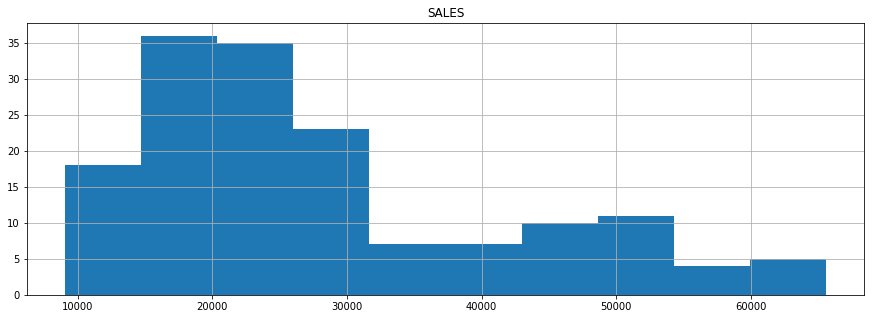

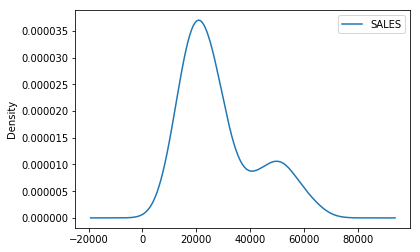

In [113]:
#Density plot for train dataset
plt.figure(figsize=(15,5))
pyplot.figure(1)
dataset.hist(figsize=(15,5))
dataset.plot(kind='kde')
pyplot.show()

<Figure size 1080x360 with 0 Axes>

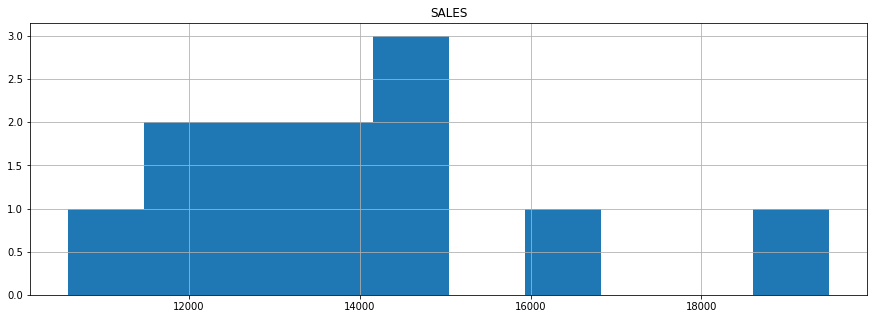

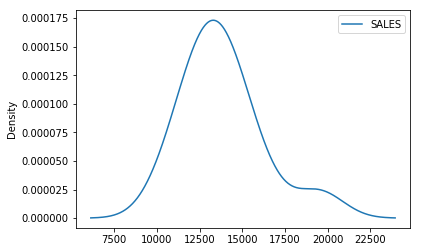

In [123]:
#Density plot for validation dataset
plt.figure(figsize=(15,5))
pyplot.figure(1)
validation.hist(figsize=(15,5))
validation.plot(kind='kde')
pyplot.show()

In [135]:
# Preparing the data for modelling
X = Chry.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [152]:
# Auto Regression Model
from statsmodels.tsa.ar_model import AR
from random import random
# Dataset for Auto Regression Model
ARdata = [X + random() for X in range(1, 100)]

model = AR(ARdata)
model_fit = model.fit()
# make prediction
ARpredict = model_fit.predict(len(ARdata), len(ARdata))
print(ARpredict)


[100.21613777]


In [153]:
# Moving Average model
from statsmodels.tsa.arima_model import ARMA
from random import random
# Dataset for Moving Average model
MAdata = [x + random() for x in range(1, 100)]

model = ARMA(MAdata, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
MApredict = model_fit.predict(len(MAdata), len(MAdata))
print(MApredict)


[74.97882288]


                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                  167
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1669.101
Method:                       css-mle   S.D. of innovations           5290.015
Date:                Sat, 02 Nov 2019   AIC                           3352.202
Time:                        00:01:29   BIC                           3374.028
Sample:                             1   HQIC                          3361.061
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -218.9694    176.795     -1.239      0.217    -565.481     127.542
ar.L1.D.SALES    -0.4488      0.079     -5.688      0.000      -0.603      -0.294
ar.L2.D.SALES    -0.2861      0.087     

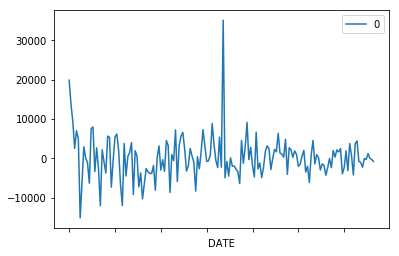

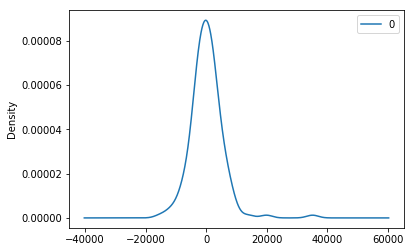

                  0
count    167.000000
mean     158.688203
std     5380.425649
min   -15129.016913
25%    -2688.213986
50%      -33.360602
75%     2538.745671
max    35104.491406


In [158]:
# Autoregressive Moving Average Model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# Dataset for Autoregressive Moving Average Model
Chry=pd.read_csv("CHRYSLER_SALES.csv", header=0, index_col=0)
#Fitting the data into model
model = ARIMA(Chry, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())